In [1]:
using DelimitedFiles
using CairoMakie
using GLMakie
using LinearAlgebra
using Random

In [14]:
copy_size = 15

nx::Int64 = copy_size
ny::Int64 = copy_size
nz::Int64 = copy_size 

include("./introduction.jl")
include("./ir_spectra.jl")


ir_spectra (generic function with 1 method)

In [15]:
ν0 = 2050.0
νk::Vector{Float64} = collect(ν0- range :step:ν0 + range)
nmols_ml = 4*nx*ny*nz
Random.seed!(1234)
num = sign.(rand(nmols_ml) .- 0.5)
random_eu = num .* eu
@time ipda, isda, ip, is = ir_spectra(νk, random_eu,  com_ol, Δν) 

253.668780 seconds (3.80 G allocations: 172.296 GiB, 4.60% gc time, 0.09% compilation time)


([9.973894591636768e-65, 4.965247300977363e-63, 2.3385506646709142e-61, 1.0420378202117358e-59, 4.392907632354804e-58, 1.75207920409146e-56, 6.611343923234883e-55, 2.3602689819008484e-53, 7.97205851053129e-52, 2.5475241029588954e-50  …  0.11671226558800595, 0.12166460820469303, 0.12486668684016917, 0.12586807571715986, 0.12443737258894956, 0.12062525662485307, 0.11478008495869953, 0.10750425089085548, 0.09955536478783342, 0.09171384086300893], [6.869032842318707e-65, 3.4186253850176837e-63, 1.6096343294051495e-61, 7.170062048136514e-60, 3.0216125506026142e-58, 1.2046892247830147e-56, 4.5439327692811686e-55, 1.6214727010759292e-53, 5.474047122740619e-52, 1.7483519560276334e-50  …  0.041925535650844455, 0.04096331506598046, 0.040096299977518624, 0.03934046783167165, 0.03869463928519179, 0.038151375811276686, 0.03770711594623928, 0.03736622169677137, 0.03713697295152785, 0.037021948751116494], [1.6503673150466242e-65, 8.221248018694257e-64, 3.8747863231007474e-62, 1.7278797140913112e-60, 

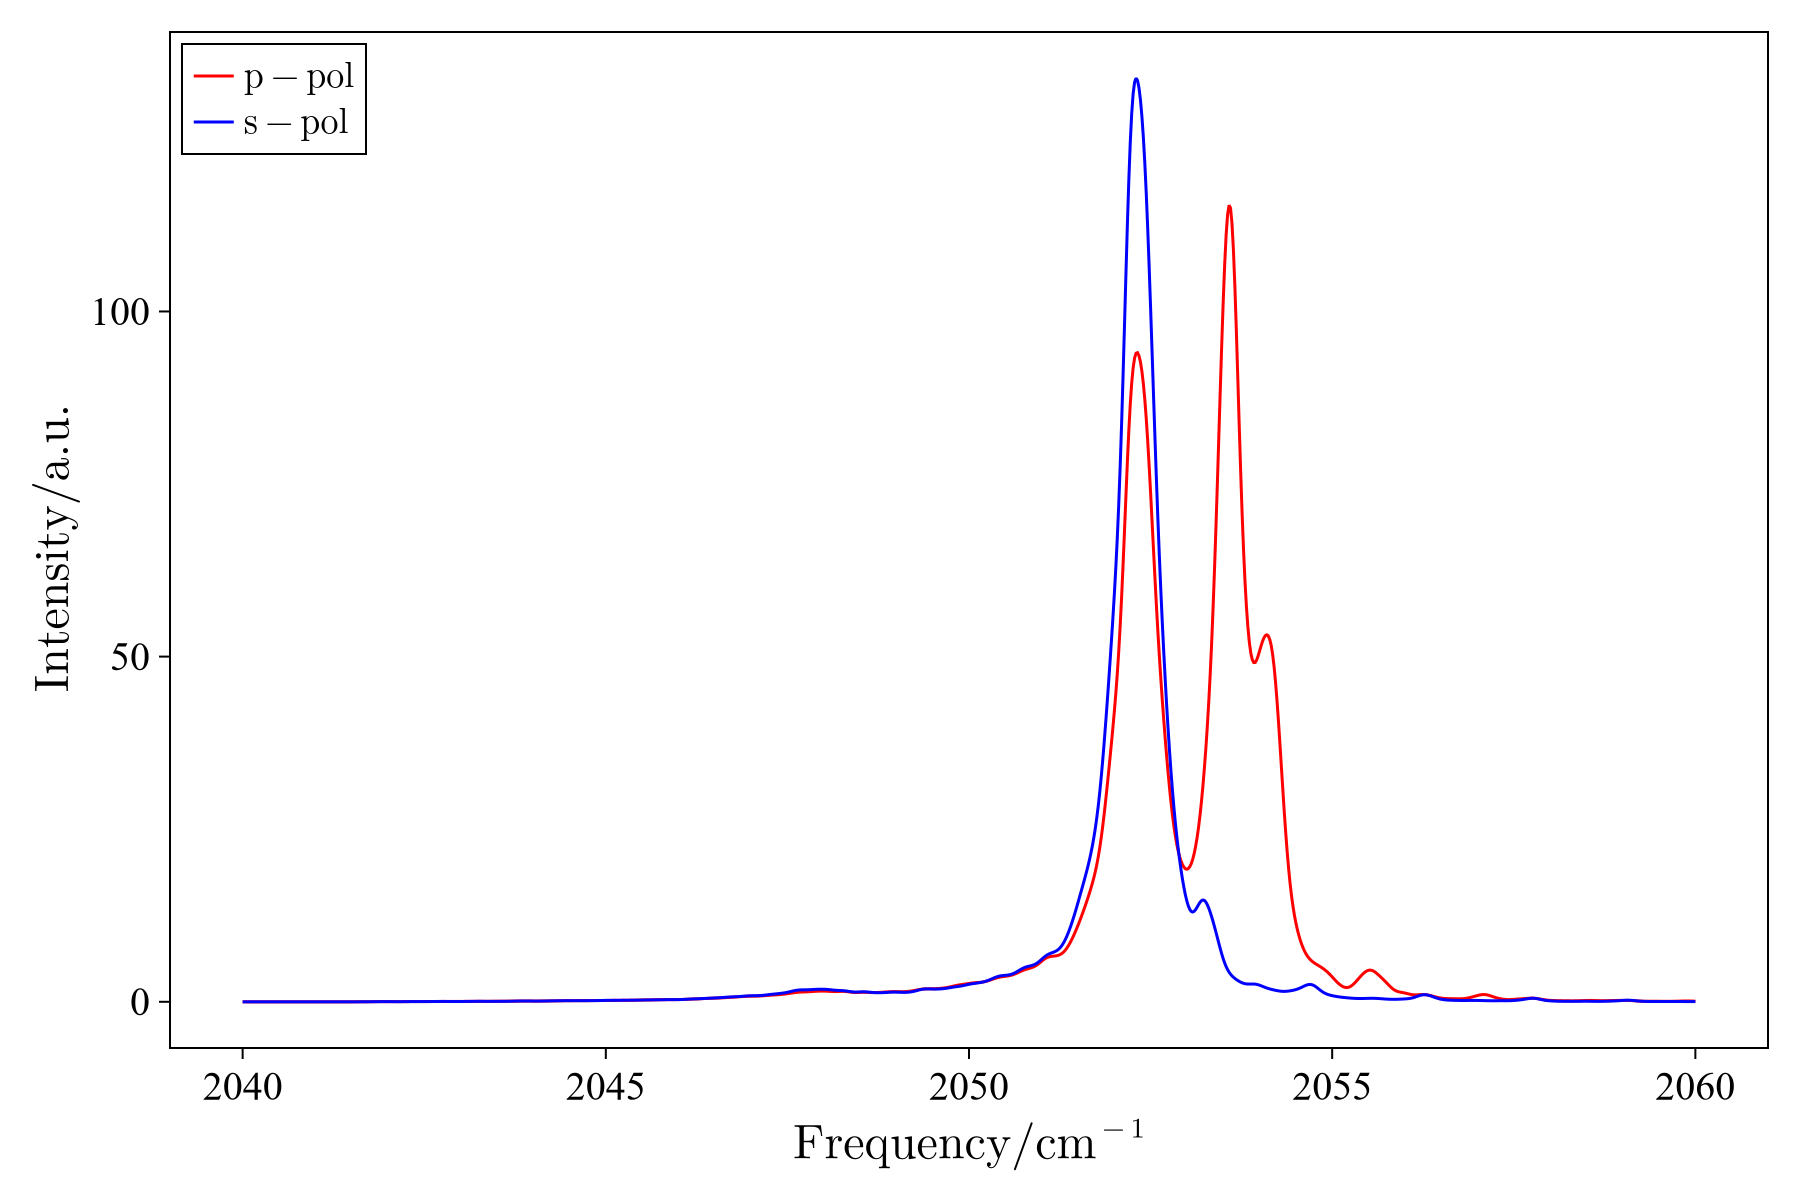

CairoMakie.Screen{IMAGE}


In [16]:
CairoMakie.activate!()
# GLMakie.activate!()
fig = Figure(size=(900, 600))

ax = Axis(fig[1,1], xlabel = L"Frequency/cm$^{-1}$", ylabel = L"Intensity/a.u. $ $", xgridvisible = false, ygridvisible = false)
ax.xlabelsize, ax.ylabelsize  = 24, 24
ax.xticklabelfont, ax.yticklabelfont = "Times New Roman", "Times New Roman"
ax.xticklabelsize, ax.yticklabelsize = 20, 20

α = 0*degrees
ipda_α = (cos(α))^2 .* ipda + (sin(α))^2 .* isda 
isda_α = (cos(α))^2 .* isda + (sin(α))^2 .* ipda 

lines!(ax, νk, ipda, color=:red, label = L"p-pol$ $")
lines!(ax, νk, isda, color=:blue, label = L"s-pol$ $")

axislegend(ax, labelsize = 18, position=:lt)
DataInspector(fig)
display(fig)

In [17]:
GLMakie.activate!()

fig = Figure()
ax = LScene(fig[1,1], show_axis = false)

meshscatter!(ax, com0_ol[:,1], com0_ol[:,2], com0_ol[:,3])

display(fig)


UndefVarError: UndefVarError: `com0_ol` not defined

In [6]:
rand()

0.5715863775229529